In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial as ft 
import plotly_express

In [2]:
car_data = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/car-data-project-practicum/vehicles_us.csv', encoding = "utf-8")

display(car_data.head())
car_data.info()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
print(car_data['model_year'].isna().sum())
car_data['model_year'] = car_data['model_year'].fillna(0)
car_data['model_year'] = car_data['model_year'].astype('int')
print(car_data['model_year'].isna().sum())

3619
0


In [4]:
print(car_data['paint_color'].isna().sum())
car_data['paint_color'] = car_data['paint_color'].fillna('Unknown')
print(car_data['paint_color'].isna().sum())

9267
0


In [5]:
print(car_data['cylinders'].isna().sum())
car_data['cylinders'] = car_data['cylinders'].fillna(0)
car_data['cylinders'] = car_data['cylinders'].astype('int')
print(car_data['cylinders'].isna().sum())

5260
0


In [6]:
print(car_data['odometer'].isna().sum())
car_data['odometer'] = car_data['odometer'].fillna(111111111)
car_data['odometer'] = car_data['odometer'].astype('int')
print(car_data['odometer'].isna().sum())

7892
0


In [7]:
print(car_data['is_4wd'].isna().sum())
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)
car_data['is_4wd'] = car_data['is_4wd'].astype('int')
print(car_data['is_4wd'].isna().sum())

25953
0


In [8]:
display(car_data.sample(10))
car_data.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
27432,12995,2002,gmc sierra 2500hd,good,8,diesel,141345,automatic,truck,custom,1,2018-11-14,14
26093,32750,2017,ford f250 super duty,like new,8,gas,42631,automatic,truck,white,1,2018-12-08,19
28893,9500,2013,toyota camry,excellent,4,gas,111111111,automatic,sedan,grey,0,2019-04-09,18
35597,12900,2014,subaru forester,good,4,gas,82180,automatic,SUV,Unknown,1,2019-03-11,90
39983,3850,2002,chevrolet silverado 1500,good,8,gas,250000,automatic,pickup,blue,0,2019-03-12,30
28868,59995,2018,ram 2500,like new,6,diesel,22635,automatic,truck,white,1,2018-08-25,83
26969,14995,2007,ram 2500,good,6,diesel,348113,automatic,truck,grey,1,2018-07-08,9
811,21900,2016,nissan frontier crew cab sv,good,6,gas,4998,other,pickup,white,0,2019-03-02,52
11140,15499,2018,honda civic,like new,4,gas,40000,manual,sedan,Unknown,0,2018-06-20,14
26049,18699,2011,gmc sierra 1500,like new,8,gas,104000,automatic,truck,white,1,2018-10-10,96


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  int64 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


In [9]:
print(car_data['fuel'].unique())
print(car_data['transmission'].unique())
print(car_data['type'].unique())
#print(car_data['price'].unique())

['gas' 'diesel' 'other' 'hybrid' 'electric']
['automatic' 'manual' 'other']
['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


fuel      transmission
diesel    automatic       22994.609644
          manual          14344.415094
          other           21649.944444
electric  automatic        7033.500000
gas       automatic       11206.104465
          manual           9524.454058
          other           17578.925990
hybrid    automatic        7537.062657
          manual           2350.000000
          other            7085.000000
other     automatic       14662.887500
          manual          16366.666667
          other           24747.800000
Name: price, dtype: float64


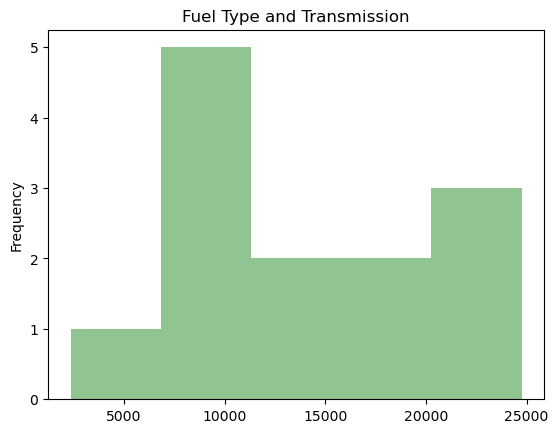

In [20]:
grp = car_data.groupby(['fuel', 'transmission'])
car_fuel_transmission = grp['price'].mean()
print(car_fuel_transmission)
car_fuel_transmission.plot(kind='hist',
                           title='Fuel Type and Transmission',
                           color='forestgreen',
                           bins=5,
                           alpha=0.5)
plt.show()